In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import neattext.functions as nfx

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
df = pd.read_csv(r'D:\projects\BEIT\precide\dataset\Suicide_Detection.csv')

In [6]:
df.head()

Unnamed: 0                                               text        class
0           2  Ex Wife Threatening SuicideRecently I left my ...      suicide
1           3  Am I weird I don't get affected by compliments...  non-suicide
2           4  Finally 2020 is almost over... So I can never ...  non-suicide
3           8          i need helpjust help me im crying so hard      suicide
4           9  I’m so lostHello, my name is Adam (16) and I’v...      suicide

In [7]:
df['class'].value_counts()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

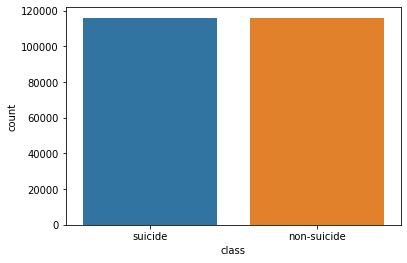

In [8]:
sns.countplot( x = 'class', data = df )

In [9]:
df['cnum'] = df['class'].apply(lambda x: 1 if x == 'suicide' else 0)

In [10]:
df.head()

Unnamed: 0                                               text        class  \
0           2  Ex Wife Threatening SuicideRecently I left my ...      suicide   
1           3  Am I weird I don't get affected by compliments...  non-suicide   
2           4  Finally 2020 is almost over... So I can never ...  non-suicide   
3           8          i need helpjust help me im crying so hard      suicide   
4           9  I’m so lostHello, my name is Adam (16) and I’v...      suicide   

   cnum  
0     1  
1     0  
2     0  
3     1  
4     1

C:\Users\Niraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnum', ylabel='Density'>

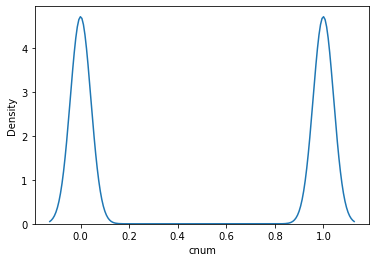

In [11]:
sns.distplot(df['cnum'],hist=False)

In [12]:
df['Clean_text'] = df['text'].apply(nfx.remove_userhandles)

In [13]:
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_stopwords)

In [14]:
Xfeatures = df['Clean_text']
ylabels = df['class']

In [15]:
df.head()

Unnamed: 0                                               text        class  \
0           2  Ex Wife Threatening SuicideRecently I left my ...      suicide   
1           3  Am I weird I don't get affected by compliments...  non-suicide   
2           4  Finally 2020 is almost over... So I can never ...  non-suicide   
3           8          i need helpjust help me im crying so hard      suicide   
4           9  I’m so lostHello, my name is Adam (16) and I’v...      suicide   

   cnum                                         Clean_text  
0     1  Ex Wife Threatening SuicideRecently left wife ...  
1     0  weird affected compliments coming know irl fee...  
2     0  Finally 2020 over... hear "2020 bad year" agai...  
3     1                  need helpjust help im crying hard  
4     1  I’m lostHello, Adam (16) I’ve struggling years...

In [1]:
x_train, x_test, y_train, y_test = train_test_split( Xfeatures , ylabels , test_size = 0.2 ,random_state = 42)

NameError: name 'train_test_split' is not defined

In [18]:
x_train.head()

103752    going kill soonI know when. know will. body mi...
208014    sub diary day 68 Today great school stuff basi...
220765    supposed do?I've got problem. years antisocial...
116840    Hey you. Yes need help new subreddit ground. s...
149067    non trans gender dysphoria like menstruation: ...
Name: Clean_text, dtype: object

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

In [20]:
from sklearn import svm
from sklearn.metrics import classification_report


In [21]:
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, y_train)

SVC(kernel='linear')

In [22]:
prediction_linear = classifier_linear.predict(test_vectors)

In [27]:
review = """I am very despoint with my life i just want to say good bye!"""
review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))

review = """Do not purchase this product. My cell phone blast when I switched the charger"""
review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))

review = """I received defective piece display is not working properly"""
review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))


['suicide']
['non-suicide']
['non-suicide']


In [30]:
import joblib
pipeline_file = open("svm_model.pkl","wb")

pipeline_file.close()